# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all the text elements
article_divs = soup.find_all('table', class_='table')
article_divs
# Extract the text with only values in it
values = soup.find_all("tr", class_="data-row")
values

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [6]:
# extracting the first values/section for all the columns:
_id = values[0].find_all('td')[0].get_text()
terrestrial_date = values[0].find_all('td')[1].get_text()
sol = values[0].find_all('td')[2].get_text()
ls = values[0].find_all('td')[3].get_text()
month = values[0].find_all('td')[4].get_text()
min_temp = values[0].find_all('td')[5].get_text()
pressure = values[0].find_all('td')[6].get_text()
print(_id, terrestrial_date, sol, ls, month, min_temp, pressure) 

2 2012-08-16 10 155 6 -75.0 739.0


In [7]:
# Read the HTML table from the web page and store it in a list of DataFrames
table_list = pd.read_html("https://static.bc-edx.com/data/web/mars_facts/temperature.html")
# Get the first DataFrame from the list (assuming there is only one table on the page)
mars_temeprature_data__df = table_list[0]
# Print the DataFrame
mars_temeprature_data__df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
mars_temperature_data_list = []
# Loop through the scraped data to create a list of rows
for item in values: 
    _id = item.find_all('td')[0].get_text()
    terrestrial_date = item.find_all('td')[1].get_text()
    sol = item.find_all('td')[2].get_text()
    ls = item.find_all('td')[3].get_text()
    month = item.find_all('td')[4].get_text()
    min_temp = item.find_all('td')[5].get_text()
    pressure = item.find_all('td')[6].get_text()
    mars_temperature_data_dict = {
        "id" : _id, 
        "terrestrial_date" : terrestrial_date,
        "sol" : sol,
        "ls" : ls,
        "month" : month,
        "min_temp" : min_temp,
        "pressure" : pressure
    }
    mars_temperature_data_list.append(mars_temperature_data_dict)

In [9]:
# Checking the mars temperature data list
mars_temperature_data_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [10]:
# Create the DataFrame from the list
mars_temperature_data_df = pd.DataFrame(mars_temperature_data_list)

In [11]:
# Confirm DataFrame was created successfully
mars_temperature_data_df.describe()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
count,1867,1867,1867,1867,1867,1867,1867
unique,1867,1867,1867,360,12,29,199
top,2,2012-08-16,10,96,4,-77.0,850.0
freq,1,1,1,8,194,138,25


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
data_types = mars_temperature_data_df.dtypes
print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Change data types for data analysis
# Convert 'id' column to integer
mars_temperature_data_df['id'] = mars_temperature_data_df['id'].astype('int')
# Convert 'terrestrial_date' column to datetime
mars_temperature_data_df['terrestrial_date'] = pd.to_datetime(mars_temperature_data_df['terrestrial_date'])
# Convert 'sol', 'ls', and 'month' columns to integer
mars_temperature_data_df[['sol', 'ls', 'month']] = mars_temperature_data_df[['sol', 'ls', 'month']].astype('int')
# Convert 'min_temp' and 'pressure' columns to float
mars_temperature_data_df[['min_temp', 'pressure']] = mars_temperature_data_df[['min_temp', 'pressure']].astype('float')

In [14]:
# Confirm type changes were successful by examining data types again
# Check the data types of all columns
data_types = mars_temperature_data_df.dtypes
print(data_types)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
month_counts = len(mars_temperature_data_df['month'].unique())
print(month_counts)

12


In [16]:
# 2. How many Martian days' worth of data are there?
# Calculate the number of Martian days worth of data in the dataset
num_martian_days = mars_temperature_data_df['sol'].max() - mars_temperature_data_df['sol'].min() + 1
# Print the result
print("The dataset contains data for", num_martian_days, "Martian days.")

The dataset contains data for 1968 Martian days.


In [17]:
# 3. What is the average low temperature by month?
# Calculate the average minimum temperature for each month
monthly_avg_min_temp = mars_temperature_data_df.groupby('month')['min_temp'].mean()
# Print the results
print(monthly_avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


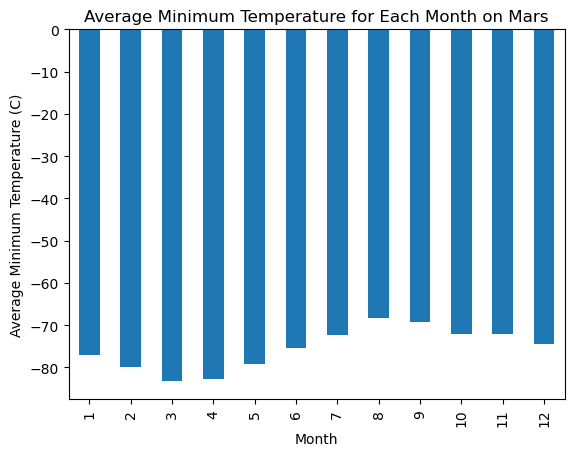

In [18]:
# Plot the average temperature by month
# create a bar chart of average minimum temperature for each month
monthly_avg_min_temp.plot.bar()
# set the x-label and y-label
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (C)')
# set the title of the plot
plt.title('Average Minimum Temperature for Each Month on Mars')
# show the plot
plt.show()

In [19]:
# Identify the coldest and hottest months in Curiosity's location
# sort the monthly temperatures in ascending order
monthly_avg_min_temp_sorted = monthly_avg_min_temp.sort_values()
# # identify the coldest and hottest months
coldest_month = monthly_avg_min_temp_sorted.index[0]
hottest_month = monthly_avg_min_temp_sorted.index[-1]
print(f'The coldest month is {coldest_month}')
print(f'The hottest month is {hottest_month}')

The coldest month is 3
The hottest month is 8


In [20]:
# 4. Average pressure by Martian month
# Calculate the average pressure for each month
monthly_avg_pressure = mars_temperature_data_df.groupby('month')['pressure'].mean()
# Print the results
print(monthly_avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [21]:
# sort the monthly average pressure in ascending order
monthly_avg_pressure_sorted = monthly_avg_pressure.sort_values()
# # identify the coldest and hottest months
lowest_atmospheric_pressure_month = monthly_avg_pressure_sorted.index[0]
highest_atmospheric_pressure_month = monthly_avg_pressure_sorted.index[-1]
print(f'The lowest atmospheric pressure month is {lowest_atmospheric_pressure_month}')
print(f'The highest atmospheric pressure month is {highest_atmospheric_pressure_month}')

The lowest atmospheric pressure month is 6
The highest atmospheric pressure month is 9


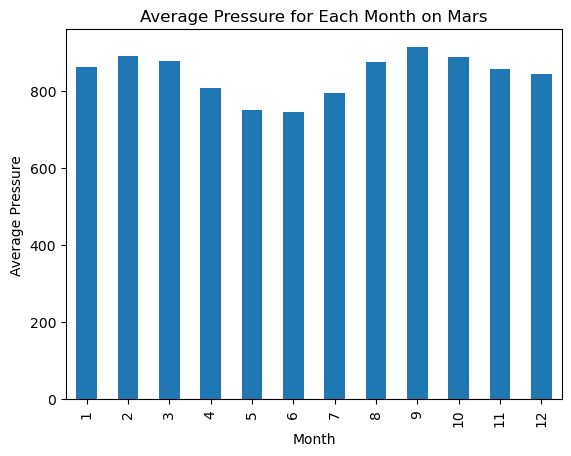

In [22]:
# Plot the average pressure by month
# create a bar chart of average minimum pressure for each month
monthly_avg_pressure.plot.bar()
# set the x-label and y-label
plt.xlabel('Month')
plt.ylabel('Average Pressure')
# set the title of the plot
plt.title('Average Pressure for Each Month on Mars')
# show the plot
plt.show()

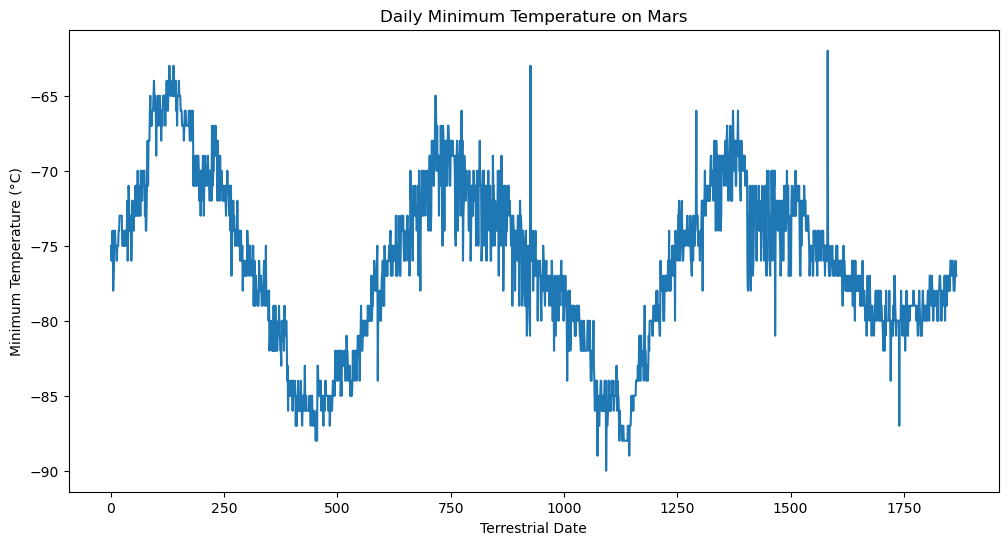

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature.
# Create a line plot of the daily minimum temperature data
mars_temperature_data_df['min_temp'].plot(figsize=(12,6))
# Set the x-label and y-label
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
# Set the title of the plot
plt.title('Daily Minimum Temperature on Mars')
# Show the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_temperature_data_df.to_csv('mars_temperature_data.csv', index=False)

In [25]:
browser.quit()